In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [3]:
df = df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
105,21,72000,0
103,33,149000,1
387,39,71000,0
20,45,22000,1
220,41,80000,0


Before moving to the Feature Scaling the one step which should must have follow is to do the Train and Test Splitting process.

Either before the Normalization or the Standardization in Feature Scaling, we must have to do this step.

Let's see how does it look like:

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis = 1), df['Purchased'], test_size = 0.3, random_state = 0)
print("Shape of the X Train: ", X_train.shape)
print("Shape of the y Train: ", y_train.shape)
print("Shape of the X Test: ", X_test.shape)
print("Shape of the y Test: ", y_test.shape)

Shape of the X Train:  (280, 2)
Shape of the y Train:  (280,)
Shape of the X Test:  (120, 2)
Shape of the y Test:  (120,)


# Standard Scaler

It is available in the scikit-learn.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
# Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

`scaler.fit(X_Train)`: From this we learn from the training set. Here, `fit()` method means that we are calculating the mean and the standard deviation of both the columns here: Age and the salary.

So, `fit()` takes the columns which are given to it and for each particular columns it calculates the mean and the standard deviation.

Then we transform both the Train and the Test data. Remember: We learn from the train data however we apply the transformation to both the Train and Test data.

In [9]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

The problem here is that we have given a dataframe to transform it. So the Dataframes are: `X_train` and `X_test`.

And after transforming it gives the numpy array which we can see below, we will convert it to the dataframe.

It means that we will convert the `X_train_scaled` and `X_test_scaled` to the pandas dataframe to get easier to read.

In [13]:
print("Scaled X train: ", X_train_scaled)
print(" ================================= ")
print("Scaled X test: ", X_test_scaled)

Scaled X train:  [[-1.1631724  -1.5849703 ]
 [ 2.17018137  0.93098672]
 [ 0.0133054   1.22017719]
 [ 0.20938504  1.07558195]
 [ 0.40546467 -0.48604654]
 [-0.28081405 -0.31253226]
 [ 0.99370357 -0.8330751 ]
 [ 0.99370357  1.8563962 ]
 [ 0.0133054   1.24909623]
 [-0.86905295  2.26126285]
 [-1.1631724  -1.5849703 ]
 [ 2.17018137 -0.80415605]
 [-1.35925203 -1.46929411]
 [ 0.40546467  2.2901819 ]
 [ 0.79762394  0.75747245]
 [-0.96709276 -0.31253226]
 [ 0.11134522  0.75747245]
 [-0.96709276  0.55503912]
 [ 0.30742485  0.06341534]
 [ 0.69958412 -1.26686079]
 [-0.47689368 -0.0233418 ]
 [-1.7514113   0.3526058 ]
 [-0.67297331  0.12125343]
 [ 0.40546467  0.29476771]
 [-0.28081405  0.06341534]
 [-0.47689368  2.2901819 ]
 [ 0.20938504  0.03449629]
 [ 1.28782302  2.20342476]
 [ 0.79762394  0.26584866]
 [-0.28081405  0.15017248]
 [ 0.0133054  -0.54388463]
 [-0.18277423  0.15017248]
 [-0.08473441  0.23692961]
 [ 0.0133054  -0.25469417]
 [ 2.17018137  1.104501  ]
 [-1.7514113   0.3526058 ]
 [ 1.876061

In [14]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [15]:
print("Scaled X train: ", X_train_scaled)
print(" ================================= ")
print("Scaled X test: ", X_test_scaled)

Scaled X train:            Age  EstimatedSalary
0   -1.163172        -1.584970
1    2.170181         0.930987
2    0.013305         1.220177
3    0.209385         1.075582
4    0.405465        -0.486047
..        ...              ...
275  0.993704        -1.151185
276 -0.869053        -0.775237
277 -0.182774        -0.514966
278 -1.065133        -0.457127
279 -1.163172         1.393691

[280 rows x 2 columns]
Scaled X test:            Age  EstimatedSalary
0   -0.771013         0.497201
1    0.013305        -0.572804
2   -0.280814         0.150172
3   -0.771013         0.265849
4   -0.280814        -0.572804
..        ...              ...
115  1.091743        -0.139018
116  0.699584         1.769639
117 -0.672973         0.555039
118  0.797624         0.352606
119  0.895664        -0.543885

[120 rows x 2 columns]


In [17]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [18]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Here we can see the scaled and transformed Dataframe has the mean of 0 and the standard deviation of 1. We got that we need. And this is the final goal of the Standardization too.

# Effect of Scaling

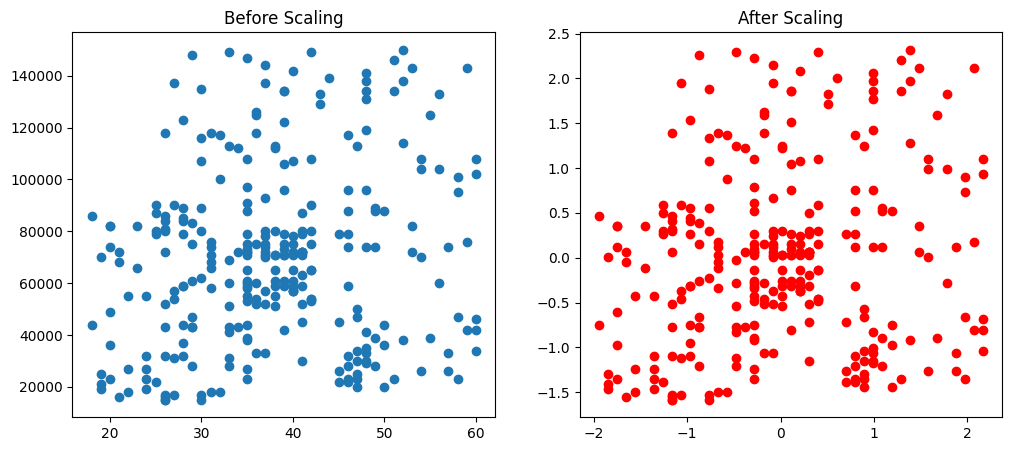

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = "red")
ax2.set_title("After Scaling")
plt.show()

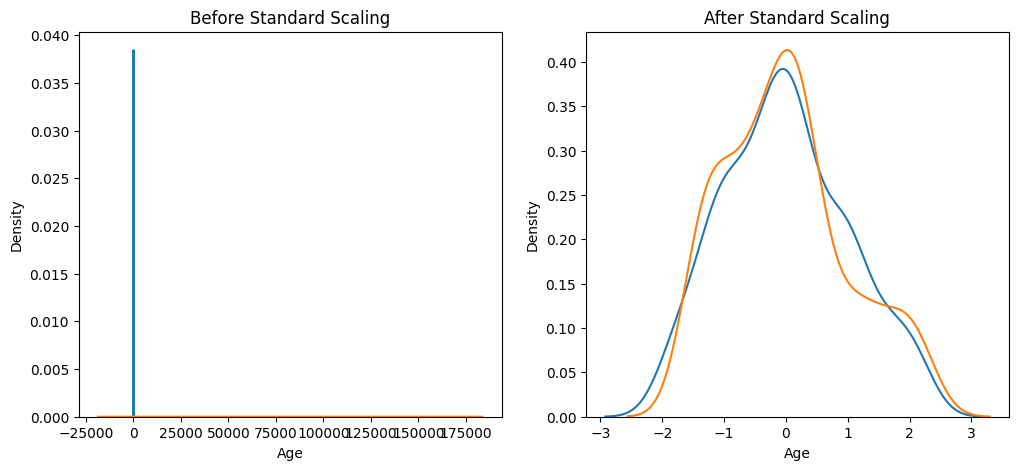

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

# Before Scaling
ax1.set_title("Before Standard Scaling")
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

# After Scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)

plt.show()

# Comparisons of Distributions

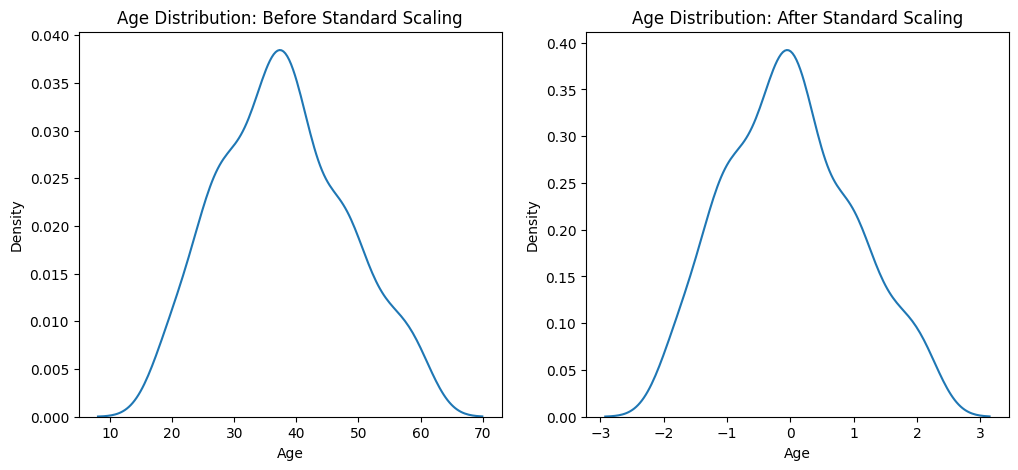

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

# Before Scaling
ax1.set_title("Age Distribution: Before Standard Scaling")
sns.kdeplot(X_train['Age'], ax = ax1)

# After Scaling
ax2.set_title("Age Distribution: After Standard Scaling")
sns.kdeplot(X_train_scaled['Age'], ax = ax2)

plt.show()

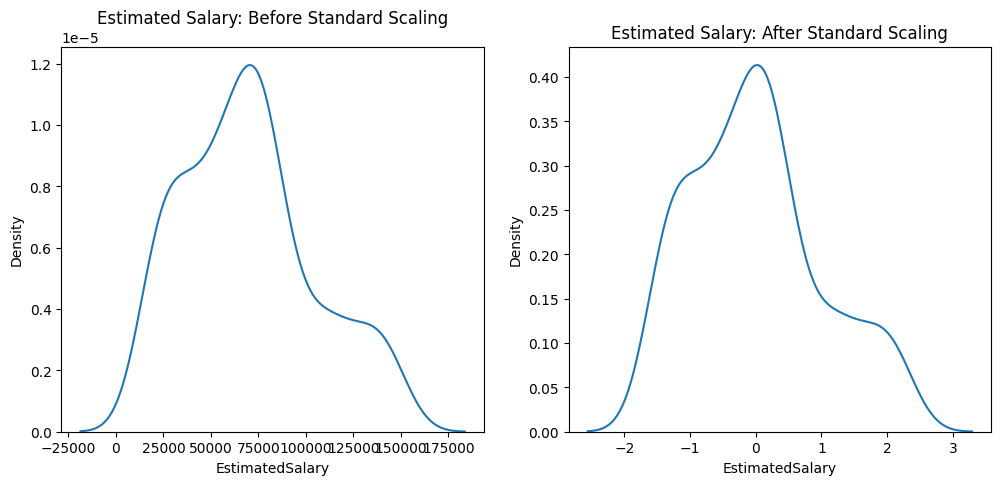

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

# Before Scaling
ax1.set_title("Estimated Salary: Before Standard Scaling")
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

# After Scaling
ax2.set_title("Estimated Salary: After Standard Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)

plt.show()

# Why scaling is important?

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [33]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [35]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [36]:
from sklearn.metrics import accuracy_score

In [38]:
print("Accuracy of Actual: ", accuracy_score(y_test, y_pred))
print("Accuracy of Scaled: ", accuracy_score(y_test, y_pred_scaled))

Accuracy of Actual:  0.875
Accuracy of Scaled:  0.8666666666666667


## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [42]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [43]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [44]:
print("Accuracy of Actual: ", accuracy_score(y_test, y_pred))
print("Accuracy of Scaled: ", accuracy_score(y_test, y_pred_scaled))

Accuracy of Actual:  0.875
Accuracy of Scaled:  0.8666666666666667


# Effect of Outliers

In [48]:
df = pd.concat([df, pd.DataFrame({'Age': [5, 90, 95], 'EstimatedSalary': [1000, 25000, 350000], 'Purchased': [0, 1, 1]})], ignore_index=True)

In [49]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
401,90,25000,1
402,95,350000,1
403,5,1000,0
404,90,25000,1


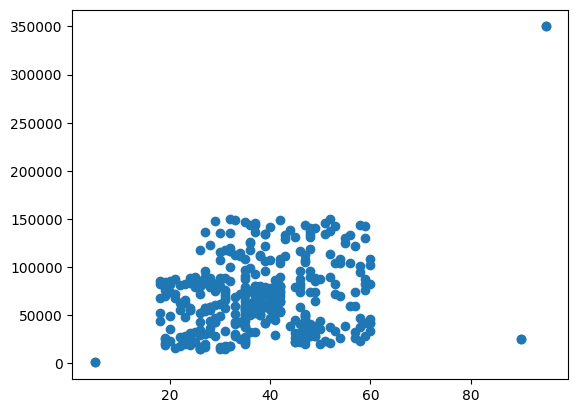

In [51]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis = 1), df['Purchased'], test_size = 0.3, random_state = 0)
print("Shape of the X Train: ", X_train.shape)
print("Shape of the y Train: ", y_train.shape)
print("Shape of the X Test: ", X_test.shape)
print("Shape of the y Test: ", y_test.shape)

Shape of the X Train:  (284, 2)
Shape of the y Train:  (284,)
Shape of the X Test:  (122, 2)
Shape of the y Test:  (122,)


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
# Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

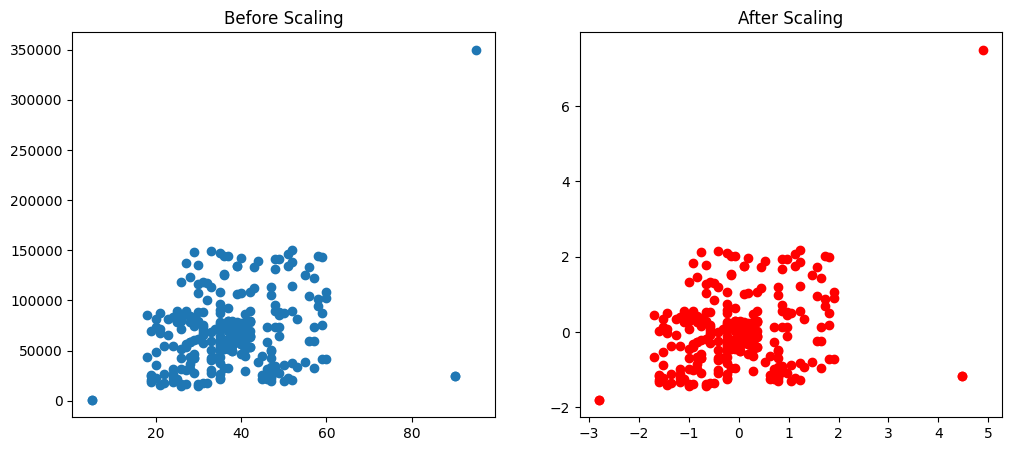

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = "red")
ax2.set_title("After Scaling")
plt.show()